<a href="https://colab.research.google.com/github/ayesharazakh/Neurobehavioral-Factors-in-Eating-Disorders/blob/main/Neurobehavioral_Factors_in_Eating_Disorders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
# Analysis of Neurobehavioral Factors in Self-Perception of Eating Disorders
#
# #Project Overview
# This project analyzes a dataset of 550 university students to identify factors influencing the self-perception of eating disorders. Using machine learning, we investigate whether behavioral patterns can predict how students view their own eating habits.
#
# Keywords: Eating Disorders, Machine Learning, Psychology, Public Health, Python, Scikit-learn
#
#  Table of Contents
# 1. Data Loading & Exploration
# 2. Data Preprocessing
# 3. Model Building & Evaluation
# 4. Results & Interpretation
# 5. Conclusion

In [117]:
# 1: Data Loading and Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [118]:
from google.colab import files
uploaded = files.upload()


Saving Dataset.csv to Dataset (2).csv


In [119]:
df = pd.read_csv('Dataset.csv')

print("First 5 rows of the data:")
print(df.head())

print("\n Dataset Info (Columns & Data Types):")
print(df.info())

print("\n All Column Names:")
print(df.columns.tolist())

First 5 rows of the data:
  Age_Range  Gender Division_ofOrigin      Current_EducationLevel  \
0     18-24    Male          Rajshahi  Bachelor's degree 3rd year   
1     25-34  Female        Chattogram    Master's degree 2nd year   
2     18-24    Male            Khulna  Bachelor's degree 2nd year   
3     18-24  Female             Dhaka  Bachelor's degree 2nd year   
4     18-24    Male            Sylhet  Bachelor's degree 3rd year   

  Employment_Status     Marital_Status EatLess_OnWeightGain  \
0           Student  In a relationship                Often   
1     Self-employed            Married                Often   
2           Student             Single                Often   
3     Self-employed            Married                Often   
4           Student             Single            Sometimes   

  EatLess_AtMealtime RefuseFood_WeightConcern Monitor_Food  ...  \
0              Never                Sometimes    Sometimes  ...   
1              Often                   Seldom 

In [120]:

# 2: Data Preprocessing
df = pd.read_csv('Dataset.csv')

# Define target and feature columns
target_column = 'Perception_EatingDisorder'

feature_columns = [
    'Age_Range', 'Gender',                         # Demographic Factor
    'EatLess_OnWeightGain',                        # Cognitive Control
    'Eat_WhenDepressedOrDiscouraged',              # Affective Value
    'EatMore_IfFoodTasty',                         # Taste Processing
    'Days_DissatisfiedWithShape',                  # Body Image Perception
    'Eat_SpecificFoodsHabitually',                 # Reward Processing / Habit Formation
    'Days_TriedLimitFoodToControlShapeOrWeight'    # Self-Perception & Behavior
]

# Create our feature set (X) and target (y)
X = df[feature_columns]
y = df[target_column]

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nSample of target values:")
print(y.value_counts())

Features (X) shape: (550, 8)
Target (y) shape: (550,)

Sample of target values:
Perception_EatingDisorder
Yes, I believe I do         296
No, I don’t believe I do    254
Name: count, dtype: int64


In [121]:
# Handling categorical data: Converting text to numbers
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_encoded = pd.get_dummies(X)

print("New X shape:", X_encoded.shape)

New X shape: (550, 28)


In [130]:
# 3: Model Training and Evaluation
# Model A (RnadomForest)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting the encoded data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

# Training the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluation of the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"RandomForest Model Accuracy: {accuracy:.2f} (or {accuracy*100:.0f}%)")

Training data size: (385, 28)
Testing data size: (165, 28)
RandomForest Model Accuracy: 0.57 (or 57%)


In [123]:
# Model B (LogisticRegression)
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Model Accuracy: {accuracy_log:.2f} (or {accuracy_log*100:.0f}%)")

Logistic Regression Model Accuracy: 0.55 (or 55%)


In [125]:
# Model C (XGBoost)
!pip install xgboost  # Run this first to install the library (only need to do this once)

import xgboost as xgb
from xgboost import XGBClassifier

# Create and train the model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb:.2f} (or {accuracy_xgb*100:.0f}%)")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:17:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model Accuracy: 0.55 (or 55%)


In [126]:
# Model D (Support Vector Machine)
from sklearn.svm import SVC

# Create and train the model
svm_model = SVC(kernel='rbf', random_state=42)  # rbf kernel handles non-linear relationships
svm_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm:.2f} (or {accuracy_svm*100:.0f}%)")

SVM Model Accuracy: 0.55 (or 55%)


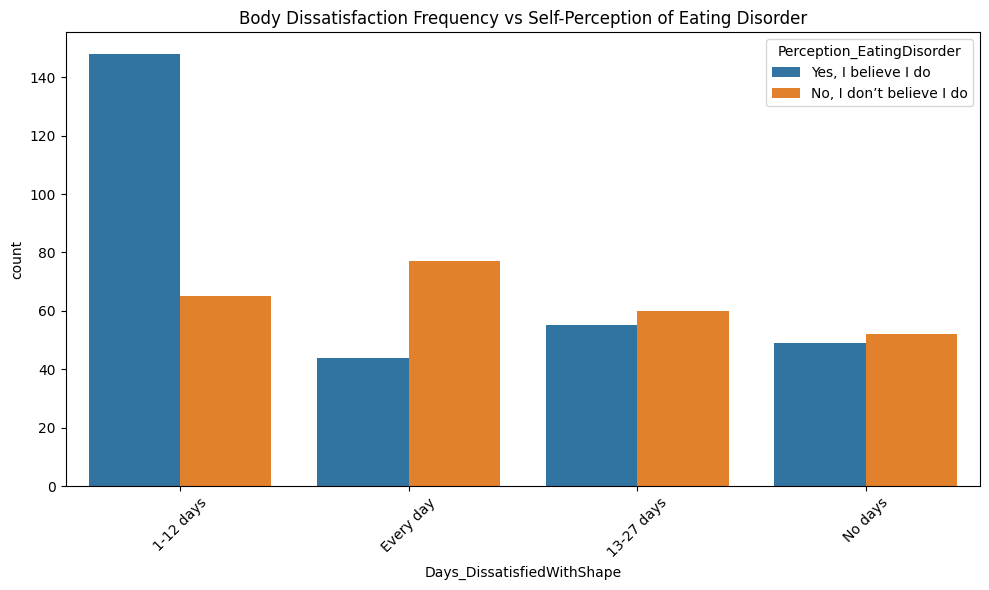

In [127]:

#4: Results and Interrpretation
#Key Insights

# Body Dissatisfaction vs Self-Perception
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Days_DissatisfiedWithShape', hue='Perception_EatingDisorder')
plt.title('Body Dissatisfaction Frequency vs Self-Perception of Eating Disorder')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


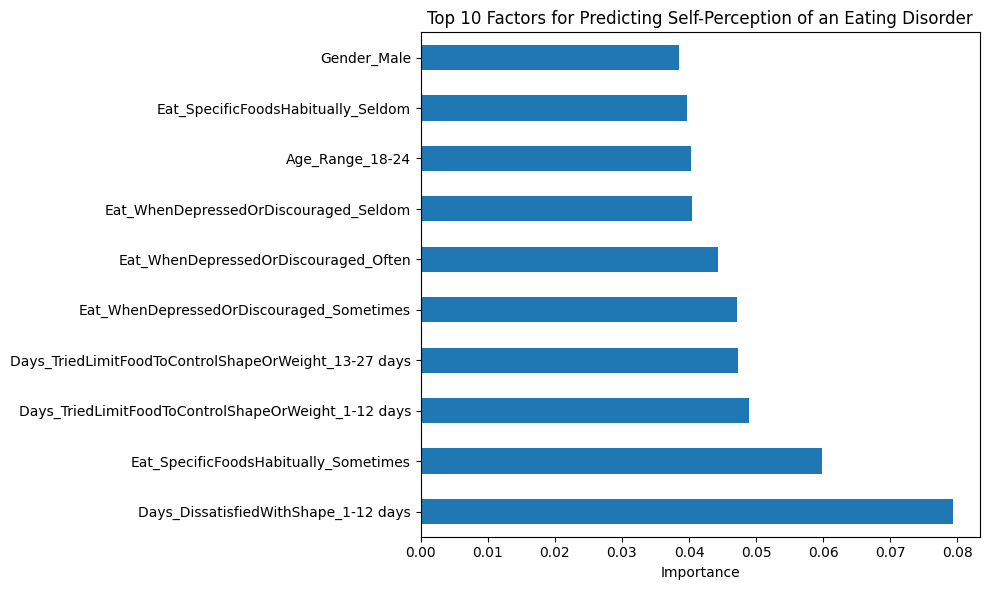

In [128]:
feature_importance = pd.Series(model.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)

# Plotting the top 10 most important features
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='barh')
plt.title('Top 10 Factors for Predicting Self-Perception of an Eating Disorder')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [129]:
#5: Conclusion
print("\n Conclusion: ")
print("All models consistently achieved ~55% accuracy, suggesting that:")
print("1. Self-perception of eating disorders has consistent predictors")
print("2. However, 45% of the perception is influenced by factors not captured in this survey, that could be genetic factors, social media influence or other psychological variables like trauma history and coping mechanisms")
print("3. Internal Narrative and Self concept plays a crucial role that surveys cannot capture")
print("4. The models are likely capturing the base signal but missing important contextual factors")

print("\n Implications: ")
print("Assessment tools rely solely on behavioral checklists that may miss nearly half of the clinical picture")
print("Future diagnostic frameworks must integrate both observable behaviors and deeper psychological narratives")

print("\n Limitations: ")
print("Since the data is limited to single population that is self reported, accuracy is reduced")
print("Future work could incorporate NLP's and better models")
print("Validating these findings against clinical diagnoses rather than self-perception could improve the dataset")


 Conclusion: 
All models consistently achieved ~55% accuracy, suggesting that:
1. Self-perception of eating disorders has consistent predictors
2. However, 45% of the perception is influenced by factors not captured in this survey, that could be genetic factors, social media influence or other psychological variables like trauma history and coping mechanisms
3. Internal Narrative and Self concept plays a crucial role that surveys cannot capture
4. The models are likely capturing the base signal but missing important contextual factors

 Implications: 
Assessment tools rely solely on behavioral checklists that may miss nearly half of the clinical picture
Future diagnostic frameworks must integrate both observable behaviors and deeper psychological narratives

 Limitations: 
Since the data is limited to single population that is self reported, accuracy is reduced
Future work could incorporate NLP's and better models
Validating these findings against clinical diagnoses rather than self-p